In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline
pd.options.mode.chained_assignment = None

# Load the fatalities dataset and clean it

In [37]:
fatal_df = pd.read_excel(open('fatal.xlsx', 'rb'), sheet_name="Data")
fatal_df = fatal_df.drop(['AvyYear', 'Description', 'Location', 'Setting'], axis = 1)
fatal_df['YYYY'], fatal_df['MM'], fatal_df['DD'] = fatal_df['YYYY'].astype(int), fatal_df['MM'].astype(int), fatal_df['DD'].astype(int)
fatal_df['YYYY'], fatal_df['MM'] = fatal_df['YYYY'].astype(str), fatal_df['MM'].astype(str)
fatal_df['Date'] = fatal_df[['YYYY', 'MM']].agg('-'.join, axis=1)
fatal_df['YYYY'], fatal_df['MM'], fatal_df['DD'] = fatal_df['YYYY'].astype('category'), fatal_df['MM'].astype('category'), fatal_df['DD'].astype('category')
fatal_df['State'], fatal_df['PrimaryActivity'], fatal_df['TravelMode'] = fatal_df['State'].astype('category'), fatal_df['PrimaryActivity'].astype('category'), fatal_df['TravelMode'].astype('category')
fatal_df['Killed'] = fatal_df["Killed"].astype(int)
fatal_df = fatal_df.rename(columns = {'YYYY':'Year', 'MM':'Month', 'DD':'Day'})
fatal_df.dtypes

Year               category
Month              category
Day                category
State              category
PrimaryActivity    category
TravelMode         category
Killed                int64
Date                 object
dtype: object

In [38]:
fatal_df

,Year,Month,Day,State,PrimaryActivity,TravelMode,Killed,Date
0,2021,5,13,AK,Climber,Foot,1,2021-5
1,2021,3,27,AK,Motorized Guided client,Ski,1,2021-3
2,2021,3,22,CO,Sidecountry Rider,Ski,1,2021-3
3,2021,3,20,CA,Snowmobiler,Foot,1,2021-3
4,2021,2,27,ID,Snowmobiler,Snowmobile,1,2021-2
...,...,...,...,...,...,...,...,...
937,1952,1,19,ID,Inbounds Rider,Ski,4,1952-1
938,1952,1,14,CA,Resident,Foot,2,1952-1
939,1952,1,7,CO,Miner,NaN,1,1952-1
940,1951,12,30,CO,Motorist,NaN,2,1951-12


# Exploratory Data Analysis

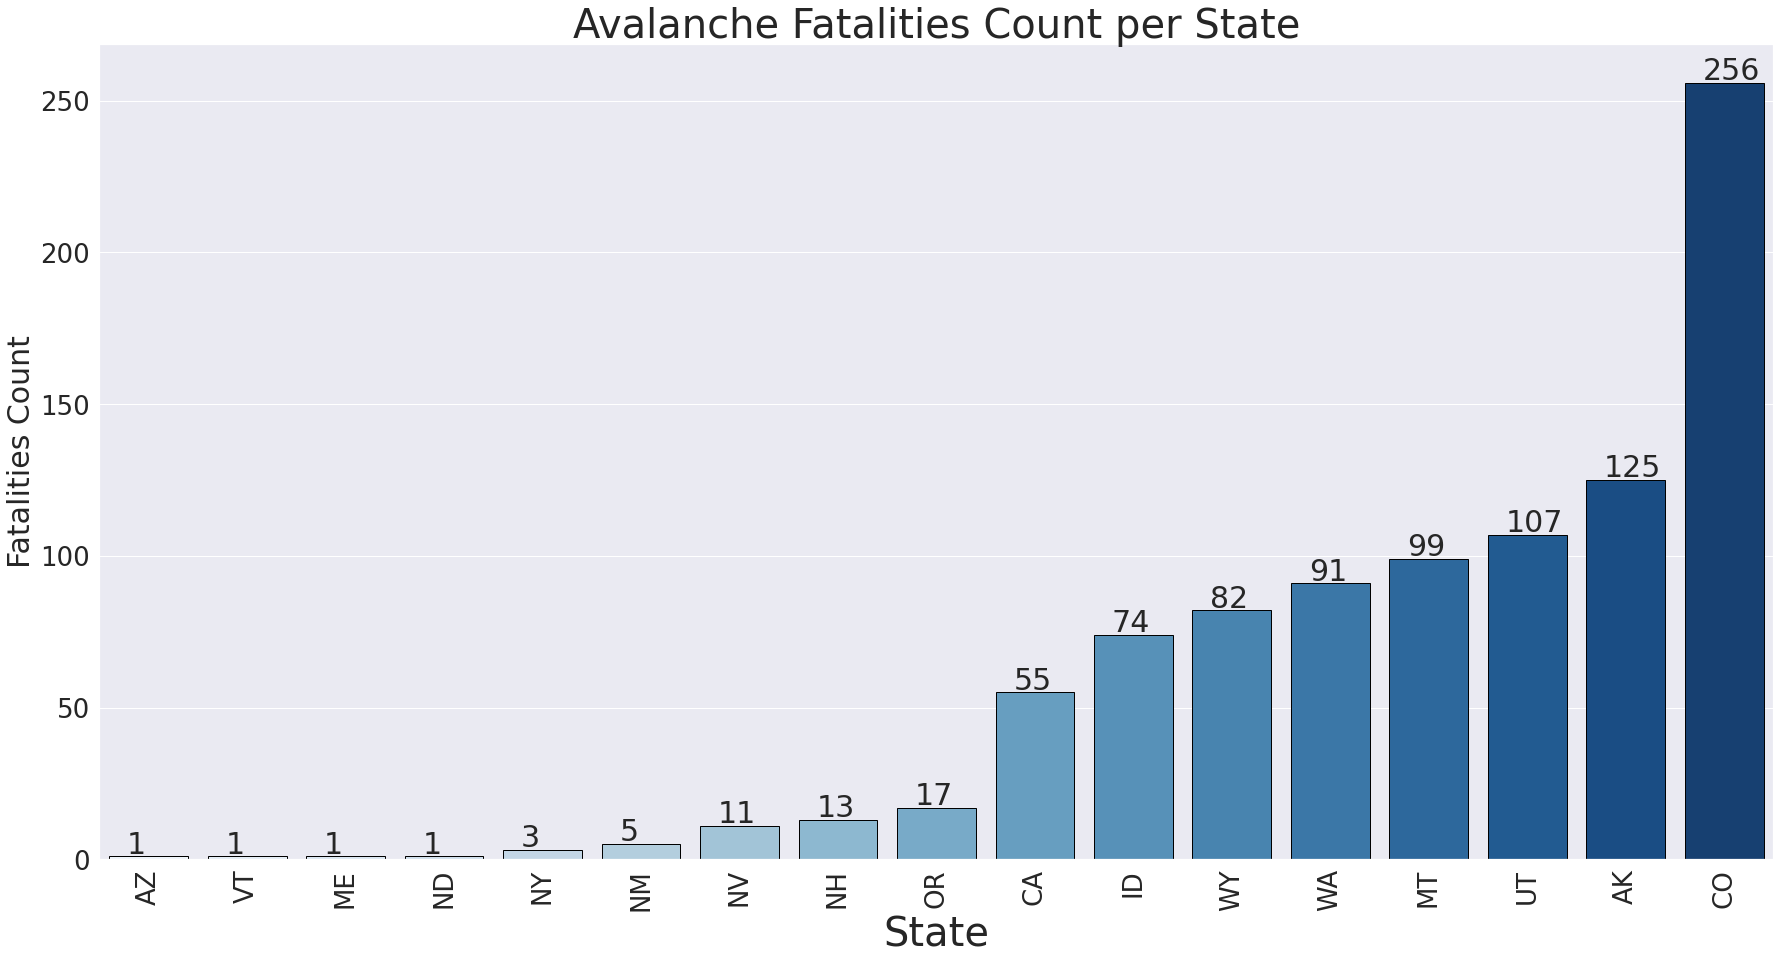

In [4]:
sns.set(rc={'figure.figsize':(30, 15)})
ax = sns.countplot(x='State', data = fatal_df, order = fatal_df['State'].value_counts(ascending=True).index, edgecolor = "Black", palette='Blues')
plt.xticks(rotation = 90, fontsize = 26)
plt.yticks(fontsize=26)
plt.xlabel("State", fontsize=40)
plt.ylabel("Fatalities Count", fontsize=30)
plt.title("Avalanche Fatalities Count per State", fontsize = 40)
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+1), fontsize=30)
plt.show()

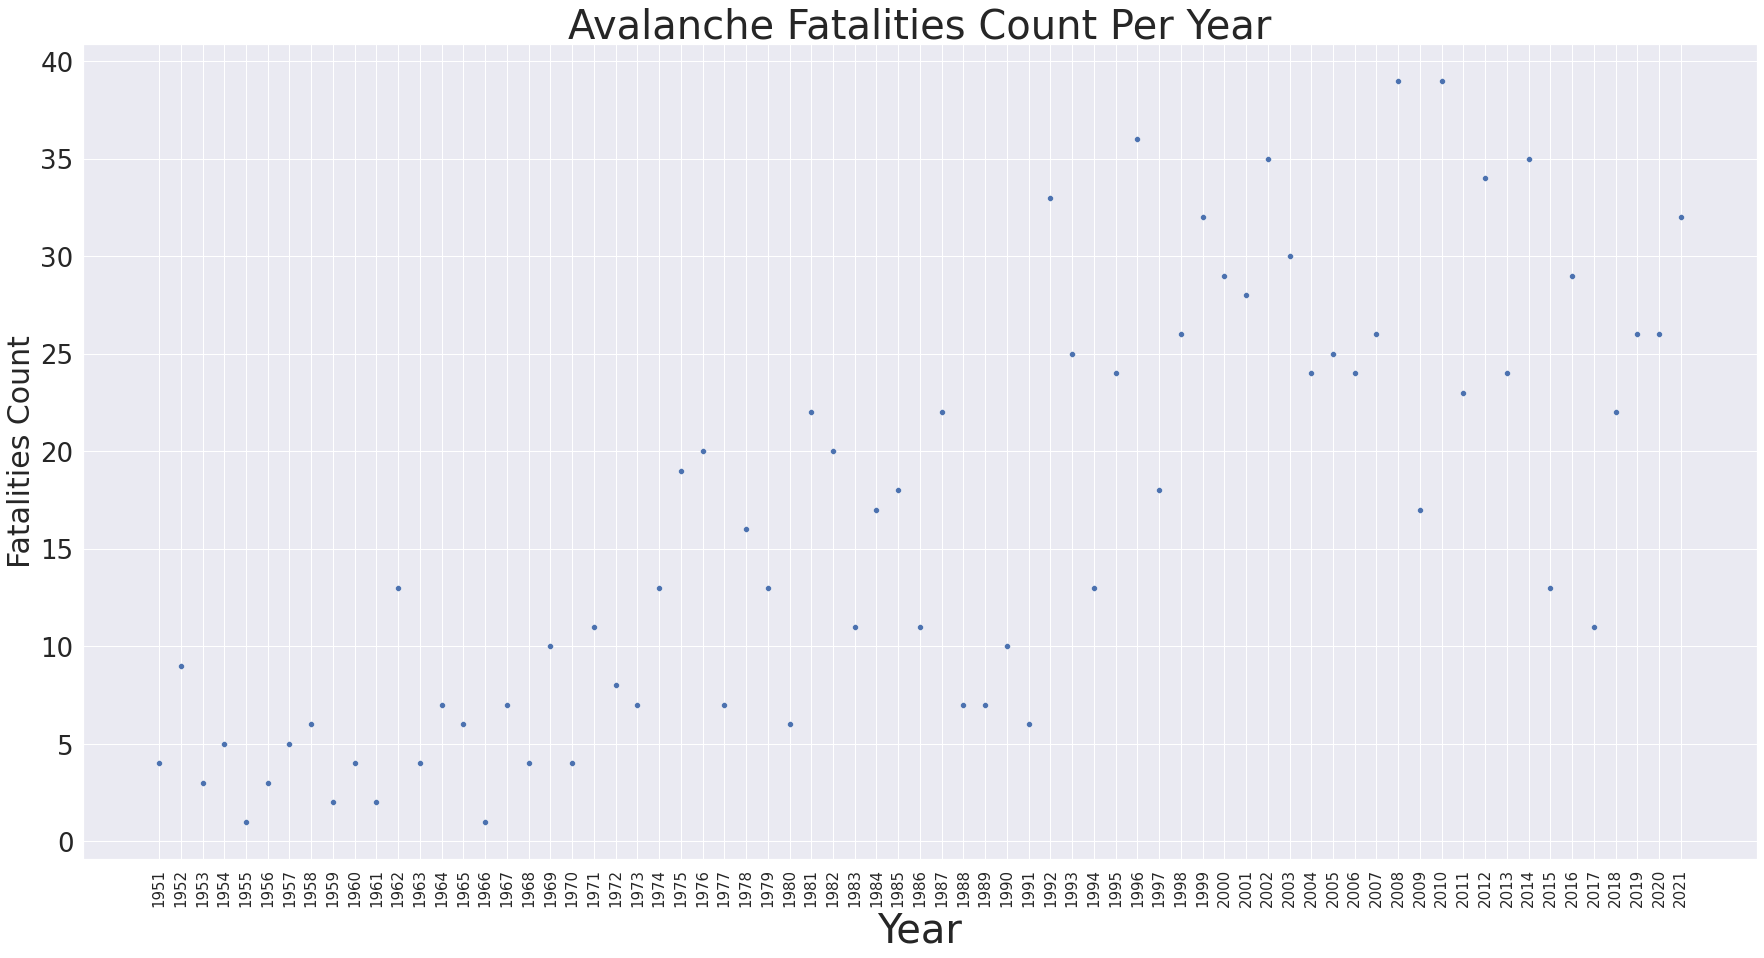

In [57]:
grouped_df = fatal_df.groupby(['Year']).sum()
grouped_df['Year'] = grouped_df.index
sns.set(rc={'figure.figsize':(30, 15)})
sns.scatterplot(x = grouped_df["Year"], y = grouped_df['Killed'])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize=26)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Fatalities Count", fontsize=30)
plt.title("Avalanche Fatalities Count Per Year", fontsize = 40)
plt.show()